# This is the Notebook for Semester 1 - CA2. This Semesters work is the the notebook CA3

# Premier League 2023/2024 Results Predictions

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn import metrics

In [2]:
#storing dataset to variable
Prem_df = pd.read_csv("matches.csv")

In [3]:
#I want to be able to view all columns at once so I use the set option fucntion in pandas library.
pd.set_option("display.max_columns", None)
Prem_df.tail()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
601,28,2024-02-25,13:30,Premier League,Matchweek 26,Sun,Away,L,0.0,1.0,Wolves,0.6,1.3,37.0,30789.0,Anel Ahmedhodžić,3-5-2,Darren Bond,Match Report,NaN,12.0,4.0,16.3,0.0,0,0,2024,SheffieldUnited
602,29,2024-03-04,20:00,Premier League,Matchweek 27,Mon,Home,L,0.0,6.0,Arsenal,0.2,2.3,20.0,29157.0,Anel Ahmedhodžić,4-5-1,Samuel Barrott,Match Report,NaN,4.0,0.0,21.8,0.0,0,0,2024,SheffieldUnited
603,30,2024-03-09,15:00,Premier League,Matchweek 28,Sat,Away,D,2.0,2.0,Bournemouth,1.2,3.3,31.0,11074.0,Jack Robinson,3-5-2,Anthony Taylor,Match Report,NaN,13.0,9.0,14.3,0.0,0,0,2024,SheffieldUnited
604,31,2024-03-30,15:00,Premier League,Matchweek 30,Sat,Home,D,3.0,3.0,Fulham,1.9,1.3,27.0,30010.0,Jack Robinson,3-5-2,Tim Robinson,Match Report,NaN,8.0,4.0,15.7,0.0,0,0,2024,SheffieldUnited
605,32,2024-04-04,19:30,Premier League,Matchweek 31,Thu,Away,L,1.0,3.0,Liverpool,0.6,1.7,17.0,60055.0,Jack Robinson,3-5-2,Stuart Attwell,Match Report,NaN,5.0,3.0,13.6,1.0,0,0,2024,SheffieldUnited


In [4]:
#how many features and observations?
Prem_df.shape

(606, 28)

In [5]:
#null values and correct datatypes.
Prem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    606 non-null    int64  
 1   Date          606 non-null    object 
 2   Time          606 non-null    object 
 3   Comp          606 non-null    object 
 4   Round         606 non-null    object 
 5   Day           606 non-null    object 
 6   Venue         606 non-null    object 
 7   Result        606 non-null    object 
 8   GF            606 non-null    float64
 9   GA            606 non-null    float64
 10  Opponent      606 non-null    object 
 11  xG            606 non-null    float64
 12  xGA           606 non-null    float64
 13  Poss          606 non-null    float64
 14  Attendance    606 non-null    float64
 15  Captain       606 non-null    object 
 16  Formation     606 non-null    object 
 17  Referee       606 non-null    object 
 18  Match Report  606 non-null    

In [6]:
Prem_df.describe()

,Unnamed: 0,GF,GA,xG,xGA,Poss,Attendance,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,0.0,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.0
mean,19.184818,1.613861,1.613861,1.539934,1.539934,50.000000,38560.471947,NaN,13.539604,4.570957,16.708746,0.364686,0.125413,0.140264,2024.0
std,11.802038,1.303298,1.303298,0.876482,0.876482,14.098356,17962.000488,NaN,5.960275,2.559845,2.867661,0.584093,0.360139,0.379381,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,10290.000000,NaN,2.000000,0.000000,7.000000,0.000000,0.000000,0.000000,2024.0
25%,9.000000,1.000000,1.000000,0.900000,0.900000,39.000000,24411.250000,NaN,9.000000,3.000000,14.800000,0.000000,0.000000,0.000000,2024.0
50%,18.500000,1.000000,1.000000,1.400000,1.400000,50.000000,38198.000000,NaN,13.000000,4.000000,16.650000,0.000000,0.000000,0.000000,2024.0
75%,29.000000,2.000000,2.000000,2.100000,2.100000,61.000000,53340.750000,NaN,17.000000,6.000000,18.400000,1.000000,0.000000,0.000000,2024.0
max,47.000000,8.000000,8.000000,7.000000,7.000000,83.000000,73612.000000,NaN,34.000000,15.000000,39.900000,3.000000,2.000000,2.000000,2024.0


## Visualisations and Statistics

I will create some statistical visualisations before moving on with the models as I want all the features available. After this I will begin the feature selection stage of the project. 

#### Possesion stats

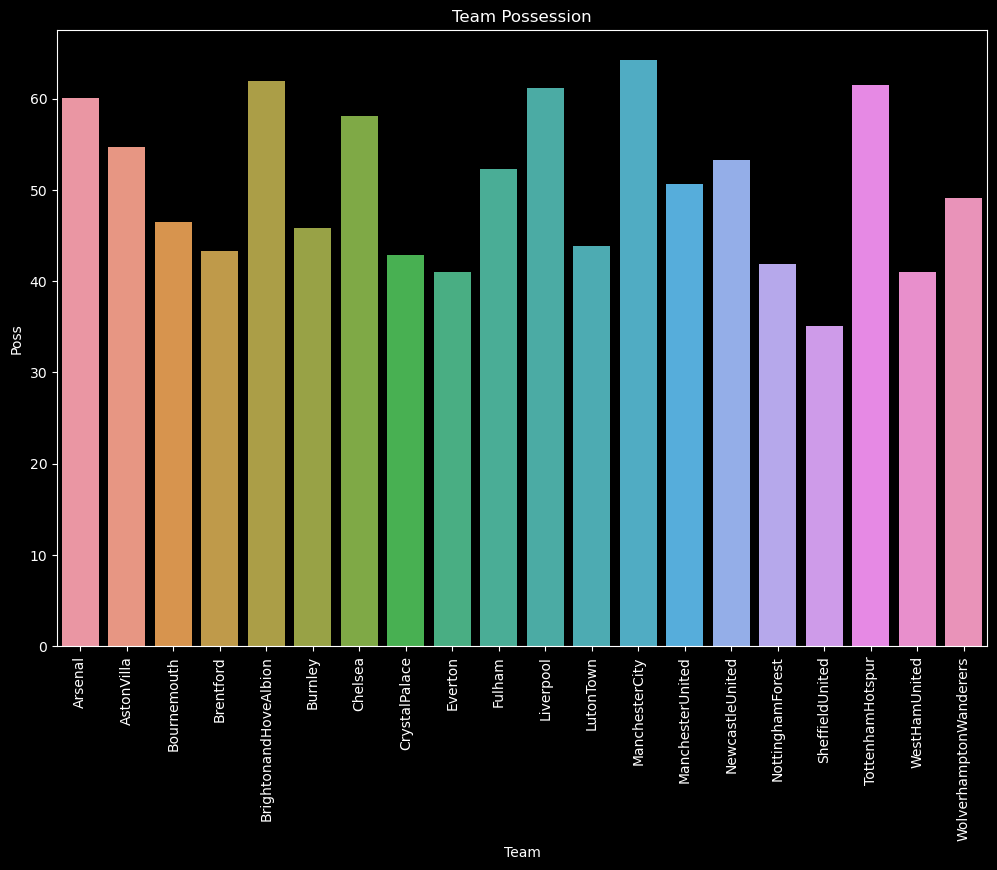

In [7]:
#Bar plot of average possesion per team trhoughout the season
#This is very useful to get an idea of how a game will play out.
#I ues the group by function to create a new dataset of the two columns and then display it in a bar plot.
team_possession = Prem_df.groupby(["Team", "Poss"]).size().reset_index().rename(columns={ 0 : "Possession"})

plt.style.use("dark_background")
plt.figure(figsize = (12,8))
sns.barplot(x = team_possession["Team"], y = team_possession["Poss"], data = team_possession, errorbar=None)
plt.xticks(rotation=90)
plt.title("Team Possession")
plt.show()

#### Home form

In [8]:
#A good way to gain an edge over the bookie is to see whether a team has a good home or away win average.
#First I need I need to split out the the wins in each and store it a variable
home_Team_wins = Prem_df[Prem_df["Venue"] == "Home"].groupby("Team")["Result"].apply(lambda x: (x == "W").sum())
H_games_per_team = Prem_df[Prem_df["Venue"] == "Home"].groupby("Team")["Result"].count()

In [9]:
#To get a percentage I divided the two togther and multiplied by 100
HomeWinPC = home_Team_wins/H_games_per_team*100
#HomeWinPC

In [10]:
#Next I do the same with home draws so I can have so I can make a new datafram containing the two
home_Draws = Prem_df[Prem_df["Venue"] == "Home"].groupby("Team")["Result"].apply(lambda x: (x == "D").sum())
Home_DrawPCT = home_Draws/H_games_per_team*100
#Home_DrawPCT

In [11]:
#To make a new dataset I combine the two variables I created above using merge from pandas library.
#I reset the index to ensure the the frist value is 0
Home_Table = pd.merge (HomeWinPC, Home_DrawPCT, on="Team", suffixes = ("_wins", "_draws"))
Home_Table_final = Home_Table.reset_index()

In [12]:
#Sorting the table in ascending order using the ascending parameter from the sort values command
#attempting to make a table from highest to lowest here but its  not working now
Home_Table_final.sort_values(by = "Result_wins", ascending = False)
Home_Table_final

,Team,Result_wins,Result_draws
0,Arsenal,80.000000,13.333333
1,AstonVilla,73.333333,6.666667
2,Bournemouth,37.500000,31.250000
3,Brentford,25.000000,37.500000
4,BrightonandHoveAlbion,50.000000,42.857143
5,Burnley,12.500000,18.750000
6,Chelsea,46.666667,26.666667
7,CrystalPalace,28.571429,28.571429
8,Everton,21.428571,28.571429
9,Fulham,60.000000,6.666667


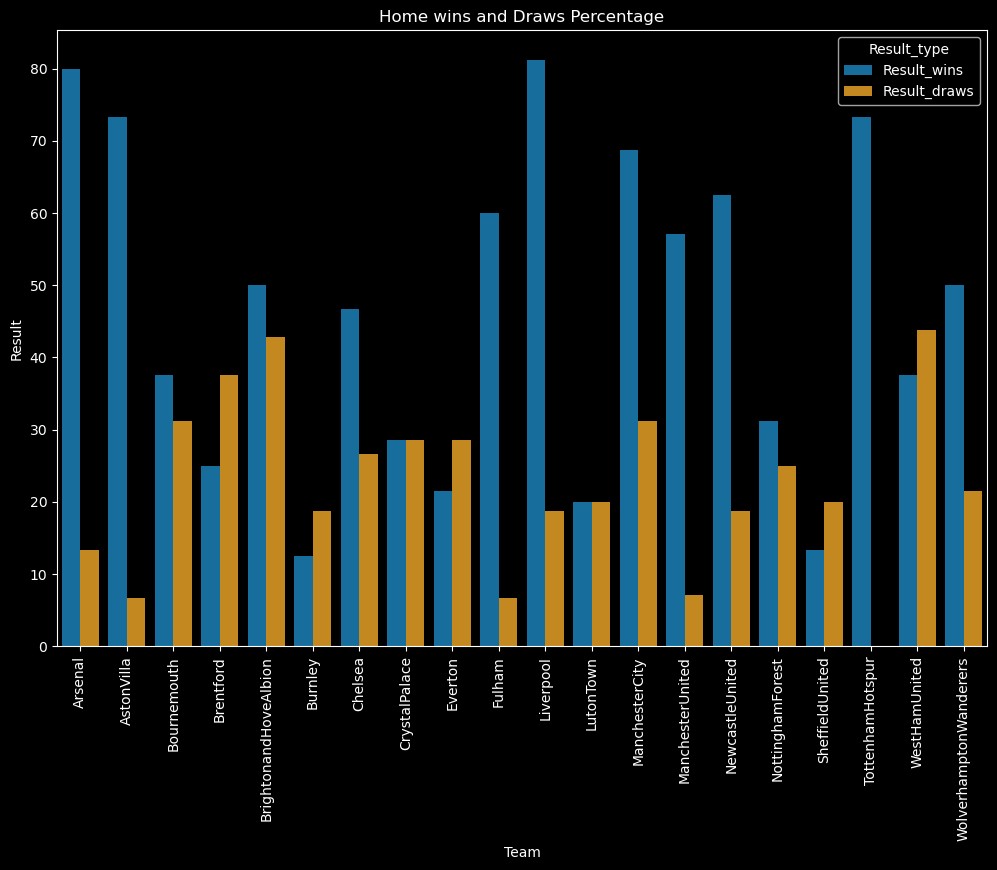

In [13]:
winsAndDrawsCombined = Home_Table_final.melt(id_vars = "Team", var_name = "Result_type", value_name = "Result")

plt.style.use("dark_background")
plt.figure(figsize = (12,8))
sns.barplot(x = "Team", y = "Result", 
            hue = "Result_type", 
            data = winsAndDrawsCombined, palette = "colorblind")
plt.xticks(rotation=90)
plt.title("Home wins and Draws Percentage")
plt.show()

#### Possesion vs Expected Goals

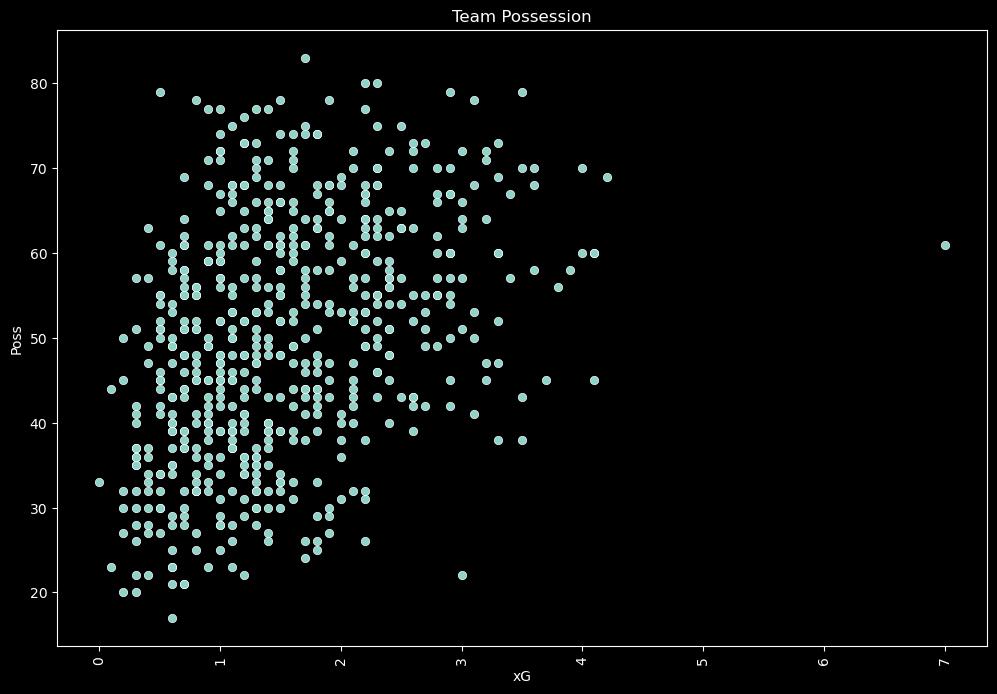

In [14]:
#Getting a idea of the expected goals based off possession per centages.
#I was curious to see if having lots of possession leads to scoring more goals.

plt.style.use("dark_background")
plt.figure(figsize = (12,8))
sns.scatterplot(x = "xG", y = "Poss", data = Prem_df)
plt.xticks(rotation=90)
plt.title("Team Possession")
plt.show()

# EDA, Outlier Detection, Feature Engineering, 

In [15]:
#List all the feature headings
print(Prem_df.columns)

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain',
       'Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'Dist',
       'FK', 'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')


In [16]:
Prem_df.describe()

,Unnamed: 0,GF,GA,xG,xGA,Poss,Attendance,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,0.0,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.0
mean,19.184818,1.613861,1.613861,1.539934,1.539934,50.000000,38560.471947,NaN,13.539604,4.570957,16.708746,0.364686,0.125413,0.140264,2024.0
std,11.802038,1.303298,1.303298,0.876482,0.876482,14.098356,17962.000488,NaN,5.960275,2.559845,2.867661,0.584093,0.360139,0.379381,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,10290.000000,NaN,2.000000,0.000000,7.000000,0.000000,0.000000,0.000000,2024.0
25%,9.000000,1.000000,1.000000,0.900000,0.900000,39.000000,24411.250000,NaN,9.000000,3.000000,14.800000,0.000000,0.000000,0.000000,2024.0
50%,18.500000,1.000000,1.000000,1.400000,1.400000,50.000000,38198.000000,NaN,13.000000,4.000000,16.650000,0.000000,0.000000,0.000000,2024.0
75%,29.000000,2.000000,2.000000,2.100000,2.100000,61.000000,53340.750000,NaN,17.000000,6.000000,18.400000,1.000000,0.000000,0.000000,2024.0
max,47.000000,8.000000,8.000000,7.000000,7.000000,83.000000,73612.000000,NaN,34.000000,15.000000,39.900000,3.000000,2.000000,2.000000,2024.0


In [17]:
#To establish what kind of values are in each features i look at the Unique values
#Prem_df["Team"].unique()
#Prem_df["Match Report"].unique()
#Prem_df["Comp"].unique()
#Prem_df["Season"].unique()
Prem_df["Formation"].unique()

array(['4-3-3', '4-2-3-1', '3-2-4-1', '3-4-3', '4-1-4-1', '4-4-2',
       '4-2-2-2', '4-4-1-1', '3-5-2', '5-3-2', '4-1-2-1-2◆', '4-2-4-0',
       '4-3-2-1', '4-5-1', '4-3-1-2', '5-4-1', '3-4-1-2', '3-5-1-1'],
      dtype=object)

### Feature Distribution

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'GF'}>, <Axes: title={'center': 'GA'}>,
        <Axes: title={'center': 'xG'}>],
       [<Axes: title={'center': 'xGA'}>,
        <Axes: title={'center': 'Poss'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'Notes'}>],
       [<Axes: title={'center': 'Sh'}>, <Axes: title={'center': 'SoT'}>,
        <Axes: title={'center': 'Dist'}>, <Axes: title={'center': 'FK'}>],
       [<Axes: title={'center': 'PK'}>,
        <Axes: title={'center': 'PKatt'}>,
        <Axes: title={'center': 'Season'}>, <Axes: >]], dtype=object)

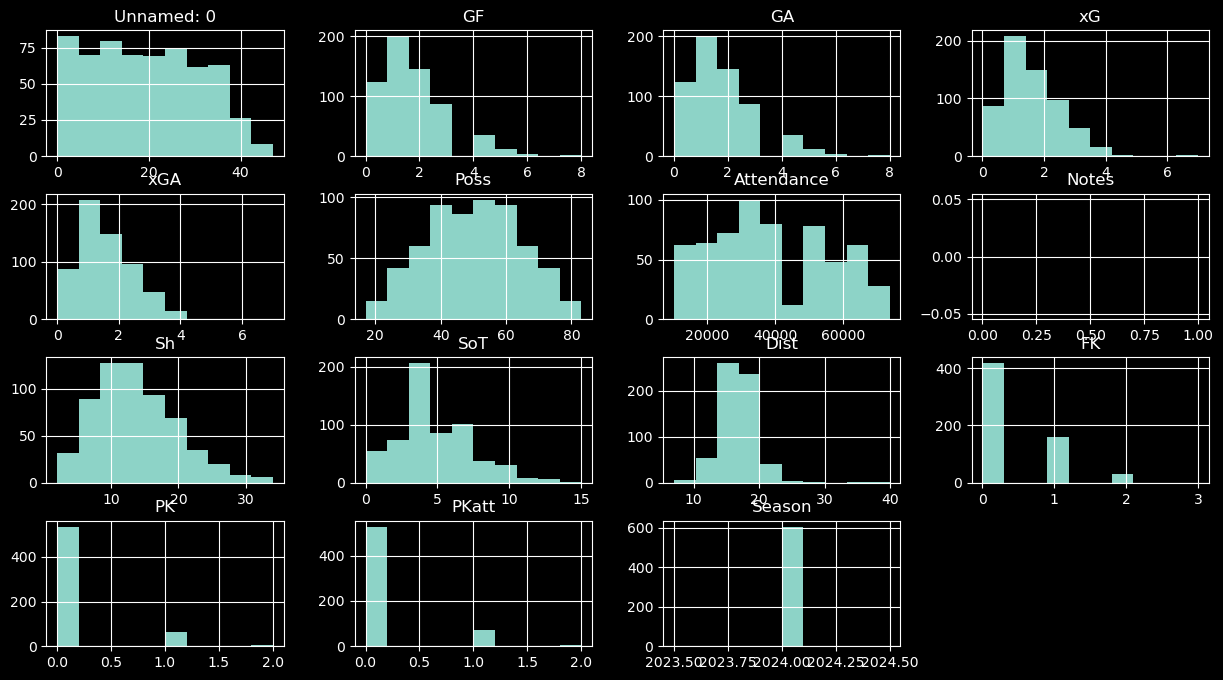

In [18]:
#After looking at the feature mean, median and std in describe, I want to visualise the distributions
Prem_df.hist(figsize = (15,8))

### Outlier Detection

Text(0.5, 1.0, 'Shots')

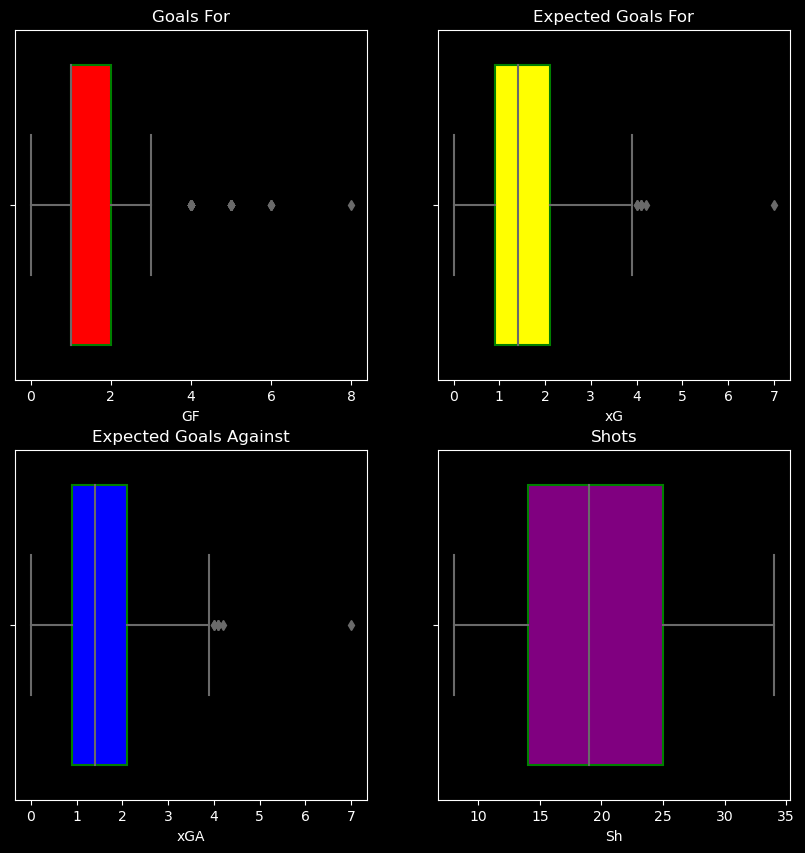

In [19]:
#I created a box plot grid to view for outliers. I selected the features in this grid by looking at each features max and median values.
#The features I selected were Goals for, Expected goals for, expected goals against and Shot.
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

#Goals for boxplot
sns.boxplot(data = Prem_df, x = Prem_df["GF"], ax=axs[0, 0]
            ,boxprops={'color': 'green', 'facecolor': 'red'})
axs[0,0].set_title("Goals For")

#Expected Goals for boxplot
sns.boxplot(data = Prem_df["xG"], x = Prem_df["xG"], ax=axs[0, 1]
            ,boxprops={'color': 'green', 'facecolor': 'yellow'})
axs[0,1].set_title("Expected Goals For")

#Expected Goals Against boxplot
sns.boxplot(data = Prem_df["xGA"], x = Prem_df["xGA"], ax=axs[1, 0]
            ,boxprops={'color': 'green', 'facecolor': 'blue'})
axs[1,0].set_title("Expected Goals Against")

#Shots for boxplot
sns.boxplot(data = Prem_df["Sh"], x = Prem_df["Sh"], ax=axs[1,1]
            ,boxprops={'color': 'green', 'facecolor': 'purple'})
axs[1,1].set_title("Shots")

There is no great threat from the outliers present in my opinion. I will not clean any columns for outliers for now. However, I will return during model testing if I deem it necessary.

#### While there are some very useful features for creating visualisations and exploring correlation between particular events taking place on any given day or with a given referee etc., I feel that these will not have a baring on the ned result of the model.

The goal of the first part of the project is ckassification task that will predict the result of the match.

Ie., The result from the team column will be eiter a Win (W), Draw (D), Loss (L)

The second part of the project is a regreesion task to calculate the total goals in the match. 

### Correlation Heatmap

In [20]:
#dataset for correlation map containing all features
Prem_corr = pd.DataFrame(Prem_df, columns = Prem_df.columns)
Prem_corr.head()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,1.3,1.4,35.0,40096.0,Virgil van Dijk,4-3-3,Anthony Taylor,Match Report,NaN,13.0,1.0,17.8,0.0,0,0,2024,Liverpool
1,1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,3.0,1.3,64.0,53145.0,Virgil van Dijk,4-3-3,Thomas Bramall,Match Report,NaN,25.0,9.0,16.8,1.0,0,1,2024,Liverpool
2,2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,0.9,2.0,41.0,52214.0,Virgil van Dijk,4-3-3,John Brooks,Match Report,NaN,9.0,4.0,17.2,1.0,0,0,2024,Liverpool
3,3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,2.5,0.7,63.0,50109.0,Trent Alexander-Arnold,4-3-3,Simon Hooper,Match Report,NaN,17.0,4.0,14.7,0.0,0,0,2024,Liverpool
4,4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,2.5,0.6,65.0,31257.0,Andrew Robertson,4-3-3,Michael Oliver,Match Report,NaN,16.0,5.0,15.8,0.0,0,0,2024,Liverpool


In [21]:
#Categorigal features cannot be used in a heatmap so I must label encode the entire dataset first.
#I alreay have an idea of what features asre the most important but I still want to visualise the entire dataset first.
#Icould delete the categoriagal features first but again, I want to gain a full picture.

categorical_features = Prem_corr[["Time", 
                                "Day",
                                "Venue",
                                "Result",
                               "Opponent",
                               "Team",
                               "Captain",
                               "Referee"]]

In [22]:
#dropping all columns that aren't related to predicting the results of matches
Prem_corr.drop(columns = ["Comp", "Match Report", "Notes","Attendance", 
                        "Season", "Unnamed: 0", "Formation", 
                        "Date", "Round", ], inplace = True)

In [23]:
#Here im using a for loop to encode the categorical features so they can used in the correlation map

from sklearn.preprocessing import LabelEncoder
encoder3 = LabelEncoder()
for cat in categorical_features:
    Prem_corr[cat] = encoder3.fit_transform(Prem_corr[cat])

Text(0.5, 1.0, 'Correlation Map Containing All Features')

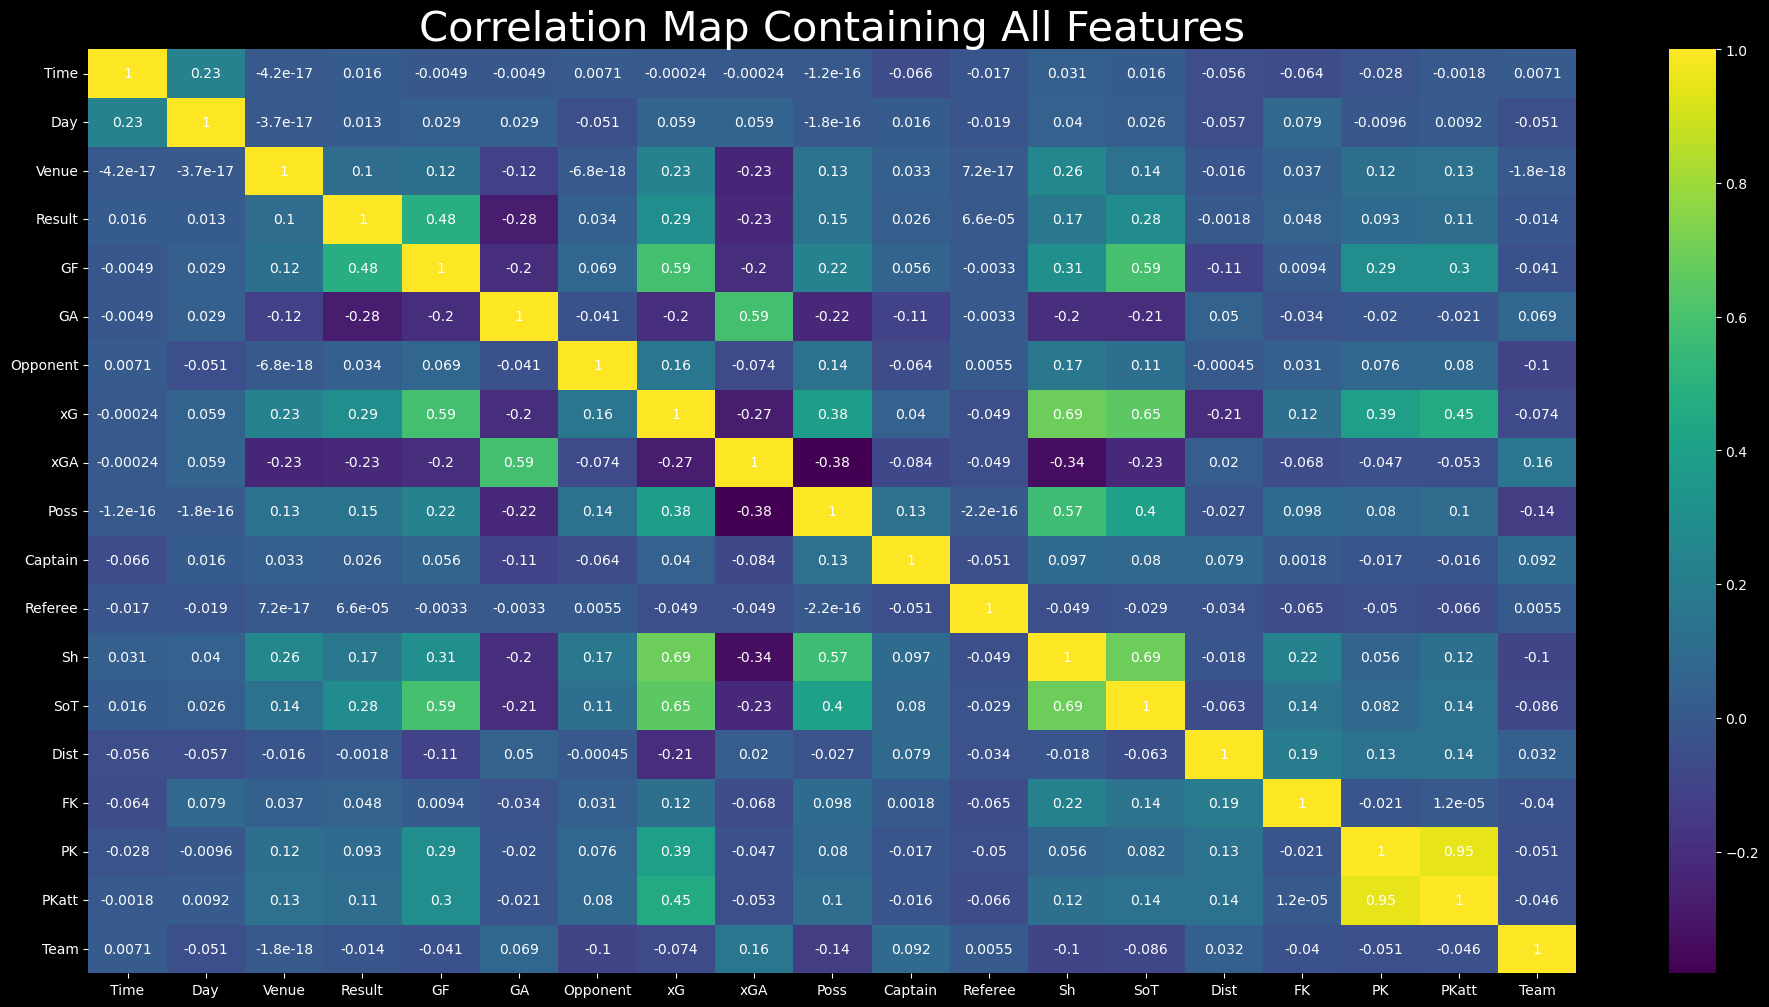

In [24]:
#create heatmap containing correlation matrix between features  
plt.figure(figsize=(24,12))
sns.heatmap(Prem_corr.corr(), annot=True, cmap = "viridis",annot_kws={'color': 'white'} )
plt.title("Correlation Map Containing All Features", fontsize=30)

In [25]:
print(Prem_df.columns)

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain',
       'Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'Dist',
       'FK', 'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')


In [26]:
#BAsed off results of the correlation heatmap, I have decided to drop the follwing features as they have little to no correlation to the target variable of result.
Prem_df.drop(columns = ["Comp", "Match Report", "Notes","Attendance", 
                        "Season", "Unnamed: 0", "Formation", 
                        "Date", "Round", "Captain", "Referee", "Dist"], inplace = True)

In [27]:
Prem_df.head()

,Time,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Sh,SoT,FK,PK,PKatt,Team
0,16:30,Sun,Away,D,1.0,1.0,Chelsea,1.3,1.4,35.0,13.0,1.0,0.0,0,0,Liverpool
1,15:00,Sat,Home,W,3.0,1.0,Bournemouth,3.0,1.3,64.0,25.0,9.0,1.0,0,1,Liverpool
2,16:30,Sun,Away,W,2.0,1.0,Newcastle Utd,0.9,2.0,41.0,9.0,4.0,1.0,0,0,Liverpool
3,14:00,Sun,Home,W,3.0,0.0,Aston Villa,2.5,0.7,63.0,17.0,4.0,0.0,0,0,Liverpool
4,12:30,Sat,Away,W,3.0,1.0,Wolves,2.5,0.6,65.0,16.0,5.0,0.0,0,0,Liverpool


## Feature Engineering/Encoding

In [28]:
#One hot encoding various features
features_toEncode = ['Day', 'Venue', 'Opponent', 'Team', 'Result']

#Storing the new a new dataset of encoded values in feature_ne
encoder = OneHotEncoder(drop='first', sparse=True, dtype=np.int32)
fresh_features = encoder.fit_transform(Prem_df[features_toEncode])
column_heading = encoder.get_feature_names_out(features_toEncode)

/Users/manwell/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
PremNew = pd.DataFrame(fresh_features.toarray(), columns=column_heading)
#PremNew.head()

In [30]:
#joining the new encoded features with the existing dataset
Prem_df = pd.concat([Prem_df, PremNew], axis =1)

In [31]:
Prem_df.drop(columns = ["Time", "Venue","Opponent", "Team", "Day"], inplace= True)

In [32]:
# #Converting to integers
# integer_conversion = ["GF","GA","xG","xGA", "Poss","Sh","SoT","FK"]

# for values in integer_conversion:
#     Prem_df[values]=Prem_df[values].astype(int)

In [33]:
#LabelEcoding Target Variable
encoder1 = LabelEncoder()
Prem_df["Result"] = encoder1.fit_transform(Prem_df["Result"])

In [34]:
Prem_df.head()

,Result,GF,GA,xG,xGA,Poss,Sh,SoT,FK,PK,PKatt,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Venue_Home,Opponent_Aston Villa,Opponent_Bournemouth,Opponent_Brentford,Opponent_Brighton,Opponent_Burnley,Opponent_Chelsea,Opponent_Crystal Palace,Opponent_Everton,Opponent_Fulham,Opponent_Liverpool,Opponent_Luton Town,Opponent_Manchester City,Opponent_Manchester Utd,Opponent_Newcastle Utd,Opponent_Nott'ham Forest,Opponent_Sheffield Utd,Opponent_Tottenham,Opponent_West Ham,Opponent_Wolves,Team_AstonVilla,Team_Bournemouth,Team_Brentford,Team_BrightonandHoveAlbion,Team_Burnley,Team_Chelsea,Team_CrystalPalace,Team_Everton,Team_Fulham,Team_Liverpool,Team_LutonTown,Team_ManchesterCity,Team_ManchesterUnited,Team_NewcastleUnited,Team_NottinghamForest,Team_SheffieldUnited,Team_TottenhamHotspur,Team_WestHamUnited,Team_WolverhamptonWanderers,Result_L,Result_W
0,0,1.0,1.0,1.3,1.4,35.0,13.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,3.0,1.0,3.0,1.3,64.0,25.0,9.0,1.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2,2.0,1.0,0.9,2.0,41.0,9.0,4.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2,3.0,0.0,2.5,0.7,63.0,17.0,4.0,0.0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2,3.0,1.0,2.5,0.6,65.0,16.0,5.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [35]:
Prem_df.describe()

,Result,GF,GA,xG,xGA,Poss,Sh,SoT,FK,PK,PKatt,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Venue_Home,Opponent_Aston Villa,Opponent_Bournemouth,Opponent_Brentford,Opponent_Brighton,Opponent_Burnley,Opponent_Chelsea,Opponent_Crystal Palace,Opponent_Everton,Opponent_Fulham,Opponent_Liverpool,Opponent_Luton Town,Opponent_Manchester City,Opponent_Manchester Utd,Opponent_Newcastle Utd,Opponent_Nott'ham Forest,Opponent_Sheffield Utd,Opponent_Tottenham,Opponent_West Ham,Opponent_Wolves,Team_AstonVilla,Team_Bournemouth,Team_Brentford,Team_BrightonandHoveAlbion,Team_Burnley,Team_Chelsea,Team_CrystalPalace,Team_Everton,Team_Fulham,Team_Liverpool,Team_LutonTown,Team_ManchesterCity,Team_ManchesterUnited,Team_NewcastleUnited,Team_NottinghamForest,Team_SheffieldUnited,Team_TottenhamHotspur,Team_WestHamUnited,Team_WolverhamptonWanderers,Result_L,Result_W
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,1.163366,1.613861,1.613861,1.539934,1.539934,50.000000,13.539604,4.570957,0.364686,0.125413,0.140264,0.049505,0.524752,0.247525,0.029703,0.066007,0.056106,0.500000,0.051155,0.049505,0.051155,0.049505,0.051155,0.047855,0.049505,0.049505,0.051155,0.049505,0.051155,0.049505,0.049505,0.049505,0.051155,0.049505,0.049505,0.051155,0.049505,0.051155,0.049505,0.051155,0.049505,0.051155,0.047855,0.049505,0.049505,0.051155,0.049505,0.051155,0.049505,0.049505,0.049505,0.051155,0.049505,0.049505,0.051155,0.049505,0.387789,0.387789
std,0.765827,1.303298,1.303298,0.876482,0.876482,14.098356,5.960275,2.559845,0.584093,0.360139,0.379381,0.217099,0.499799,0.431931,0.169907,0.248499,0.230316,0.500413,0.220496,0.217099,0.220496,0.217099,0.220496,0.213635,0.217099,0.217099,0.220496,0.217099,0.220496,0.217099,0.217099,0.217099,0.220496,0.217099,0.217099,0.220496,0.217099,0.220496,0.217099,0.220496,0.217099,0.220496,0.213635,0.217099,0.217099,0.220496,0.217099,0.220496,0.217099,0.217099,0.217099,0.220496,0.217099,0.217099,0.220496,0.217099,0.487648,0.487648
min,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.900000,0.900000,39.000000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.400000,1.400000,50.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [36]:
Prem_df.shape

(606, 58)

# Modeling Random Forrest Classifier Task

In [37]:
X = Prem_df.drop(columns = ["Result"])
y = Prem_df["Result"]

In [38]:
#X.head()
y.head()

0    0
1    2
2    2
3    2
4    2
Name: Result, dtype: int64

In [39]:
X.shape

(606, 57)

In [40]:
# random_state is the seed used by the random number generator, it can be any integer.
# Splitting data into testing and training. First I will employ an 70/30 split. 70% training and 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70 , random_state = 42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((606, 57), (606,), (424, 57), (182, 57), (424,), (182,))

In [41]:
# import RandomForestClassifier libraries
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)


# Fit the model using rf_model.fit()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [42]:
print("Random Forrest Training set score: {:.2f}".format(rf_model.score(X_train, y_train)))
print("Random Forrest Test set score: {:.2f}".format(rf_model.score(X_test, y_test)))

Random Forrest Training set score: 1.00
Random Forrest Test set score: 1.00


In [43]:
#Having a quick look at the feature importance/ GINI importance so I can get a better idea of what features can be dropped or changed etc.
feature_relavance = rf_model.feature_importances_

# Sort feature importances in descending order
indices = feature_relavance.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for i in indices:
    print(f"{X.columns[i]}: {feature_relavance[i]}")

Feature Importances:
Result_W: 0.24880518695729315
Result_L: 0.21986263749881446
GA: 0.12526827791662368
GF: 0.12315595658218134
xG: 0.042571860861005444
xGA: 0.03819090466943417
SoT: 0.03511972220113482
Sh: 0.027124000341800337
Poss: 0.02062200381902104
FK: 0.006815901774002669
Day_Sat: 0.006003161718417655
Day_Sun: 0.00577850188845396
Venue_Home: 0.004869805438652017
PK: 0.004546289219355242
PKatt: 0.00424318852539671
Team_TottenhamHotspur: 0.0033346527640716393
Team_SheffieldUnited: 0.0029621196164862367
Team_WolverhamptonWanderers: 0.0028779287432803397
Opponent_Aston Villa: 0.0028417533356674875
Opponent_Crystal Palace: 0.002836018228081638
Team_NottinghamForest: 0.002795672282895846
Team_Everton: 0.002619722984714835
Opponent_Nott'ham Forest: 0.002609036044574193
Opponent_Manchester Utd: 0.00255939663552169
Opponent_Manchester City: 0.0025354726976061994
Opponent_Liverpool: 0.002440774061289793
Opponent_Fulham: 0.002391809748229357
Team_ManchesterUnited: 0.002351370356745383
Day_

## Cross Validation of Random Forrest Classifier 

In [44]:
#Using grid search cross validation to find the best parameters for the decision tree.
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()

value_grid ={
    "n_estimators": [20,100,30],
    "max_features":[22],
    #,4,6,8,10,12,14,16,18,20,22,24,28]
}

search_grid = GridSearchCV(rf_model, value_grid, cv = 5,
                          scoring = "neg_mean_squared_error",
                          return_train_score=True)

search_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [22], 'n_estimators': [20, 100, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
#I using the .best_estimator parameter to find the correct amount of features and n_estimators to use to ensure the model is workign to highest standard it can.
cross_val_rf_model = search_grid.best_estimator_
cross_val_rf_model

RandomForestClassifier(max_features=22, n_estimators=20)

In [46]:
cross_val_rf_model.score(X_test, y_test)

1.0

In [47]:
cross_val_rf_model.fit(X_train, y_train)
y_pred = cross_val_rf_model.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


test_mse = mean_squared_error(y_test, y_pred)
print(f'Test Set Mean Squared Error: {test_mse}')

Test Set Mean Squared Error: 0.0


In [49]:
print("Random Forrest Training set score after Grid Search CV: {:.2f}".format(cross_val_rf_model.score(X_train, y_train)))
print("Random Forrest Test set scoreafter Grid Search CV: {:.2f}".format(cross_val_rf_model.score(X_test, y_test)))

Random Forrest Training set score after Grid Search CV: 1.00
Random Forrest Test set scoreafter Grid Search CV: 1.00


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%


In [51]:
con_matrix = confusion_matrix(y_test, y_pred)
print(con_matrix)

[[43  0  0]
 [ 0 76  0]
 [ 0  0 63]]


The confusion reads as follows:

There was a total 182 tests undertaken by the model.

#### Class 0
41 correctly classified.- true postives
4 incorreclty classified as class 1 & 2. - False Postives


#### Class 1
74 correctly classified.- true postives
2 incorreclty classified as class 1. - False Postives

#### Class 2
63 correctly classified.- true postives
No other mistakes made.

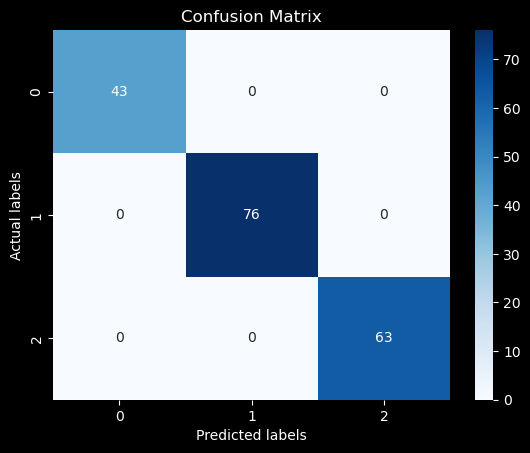

In [52]:
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

# Linear Regeression on Total Expected Goals

My first step is to laod the data set agin as I want adjust some features wihin it. 

In [53]:
#Making a new dataset out of the old prem df observations and features.
Prem_df__Goals_scored = pd.DataFrame(Prem_df, columns = Prem_df.columns)

In [54]:
Prem_df__Goals_scored.head()

,Result,GF,GA,xG,xGA,Poss,Sh,SoT,FK,PK,PKatt,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Venue_Home,Opponent_Aston Villa,Opponent_Bournemouth,Opponent_Brentford,Opponent_Brighton,Opponent_Burnley,Opponent_Chelsea,Opponent_Crystal Palace,Opponent_Everton,Opponent_Fulham,Opponent_Liverpool,Opponent_Luton Town,Opponent_Manchester City,Opponent_Manchester Utd,Opponent_Newcastle Utd,Opponent_Nott'ham Forest,Opponent_Sheffield Utd,Opponent_Tottenham,Opponent_West Ham,Opponent_Wolves,Team_AstonVilla,Team_Bournemouth,Team_Brentford,Team_BrightonandHoveAlbion,Team_Burnley,Team_Chelsea,Team_CrystalPalace,Team_Everton,Team_Fulham,Team_Liverpool,Team_LutonTown,Team_ManchesterCity,Team_ManchesterUnited,Team_NewcastleUnited,Team_NottinghamForest,Team_SheffieldUnited,Team_TottenhamHotspur,Team_WestHamUnited,Team_WolverhamptonWanderers,Result_L,Result_W
0,0,1.0,1.0,1.3,1.4,35.0,13.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,3.0,1.0,3.0,1.3,64.0,25.0,9.0,1.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2,2.0,1.0,0.9,2.0,41.0,9.0,4.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2,3.0,0.0,2.5,0.7,63.0,17.0,4.0,0.0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2,3.0,1.0,2.5,0.6,65.0,16.0,5.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [55]:
#I'm trying to caluclate the "teams" expected goals per game 
Prem_df__Goals_scored["total XG"] = Prem_df__Goals_scored["xGA"] + Prem_df__Goals_scored["xG"]

In [56]:
X = Prem_df__Goals_scored.drop(columns = ["Result","GF","xGA","xG","Day_Mon",
                                          "Day_Sat","Day_Sun","Day_Thu","Day_Tue","Day_Wed","total XG","GA"])
y = Prem_df__Goals_scored["xG"]

In [57]:
X.head()

,Poss,Sh,SoT,FK,PK,PKatt,Venue_Home,Opponent_Aston Villa,Opponent_Bournemouth,Opponent_Brentford,Opponent_Brighton,Opponent_Burnley,Opponent_Chelsea,Opponent_Crystal Palace,Opponent_Everton,Opponent_Fulham,Opponent_Liverpool,Opponent_Luton Town,Opponent_Manchester City,Opponent_Manchester Utd,Opponent_Newcastle Utd,Opponent_Nott'ham Forest,Opponent_Sheffield Utd,Opponent_Tottenham,Opponent_West Ham,Opponent_Wolves,Team_AstonVilla,Team_Bournemouth,Team_Brentford,Team_BrightonandHoveAlbion,Team_Burnley,Team_Chelsea,Team_CrystalPalace,Team_Everton,Team_Fulham,Team_Liverpool,Team_LutonTown,Team_ManchesterCity,Team_ManchesterUnited,Team_NewcastleUnited,Team_NottinghamForest,Team_SheffieldUnited,Team_TottenhamHotspur,Team_WestHamUnited,Team_WolverhamptonWanderers,Result_L,Result_W
0,35.0,13.0,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,64.0,25.0,9.0,1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,41.0,9.0,4.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,63.0,17.0,4.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,65.0,16.0,5.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [58]:
# random_state is the seed used by the random number generator, it can be any integer.
# Splitting data into testing and training. First I will employ an 80/20 split. 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20 , random_state = 100)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((606, 47), (606,), (484, 47), (122, 47), (484,), (122,))

In [59]:
from sklearn.linear_model import LinearRegression

Lr_reg = LinearRegression()

Lr_reg.fit(X_train, y_train)
y_pred = Lr_reg.predict(X_test)

In [60]:
print("Lr_reg : Training set score: {:.2f}".format(Lr_reg.score(X_train, y_train))) 
print("Lr_reg : Test set score: {:.2f}".format(Lr_reg.score(X_test, y_test)))

Lr_reg : Training set score: 0.72
Lr_reg : Test set score: 0.69


## Model Evaluation

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mean_ab_error = mean_absolute_error(y_test, y_pred)
mean_sq_error = mean_squared_error(y_test, y_pred)
root_mean_sq_error = mean_sq_error ** 0.5
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mean_ab_error}")
print(f"Mean Squared Error (MSE): {mean_sq_error}")
print(f"Root Mean Squared Error (RMSE): {root_mean_sq_error}")
print(f"R^2 (Coefficient of Determination): {r2}")

Mean Absolute Error (MAE): 0.3686505736950382
Mean Squared Error (MSE): 0.2219433746160407
Root Mean Squared Error (RMSE): 0.47110866540113727
R^2 (Coefficient of Determination): 0.6867530538271891


## Visualising Results

In [62]:
Prem_df__totalXgoals = pd.DataFrame({'total_Xgoals Actual': y_test, 'total_Xgoals Predicted': y_pred})
Prem_df__totalXgoals.head(10)

,total_Xgoals Actual,total_Xgoals Predicted
378,1.3,1.535525
326,1.3,1.235252
154,0.9,0.617070
573,2.8,2.181564
312,2.1,2.113509
395,2.1,2.152743
127,2.2,2.738058
230,2.4,2.543604
374,1.2,1.158541
157,1.3,1.392224


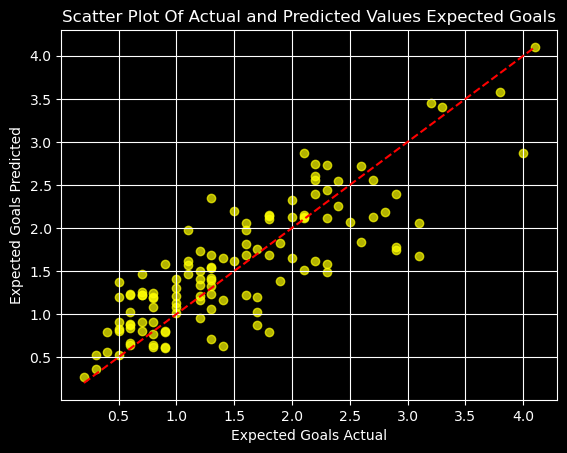

In [63]:
plt.scatter(Prem_df__totalXgoals["total_Xgoals Actual"],Prem_df__totalXgoals["total_Xgoals Predicted"], color='yellow', alpha=0.7)
plt.plot([Prem_df__totalXgoals['total_Xgoals Actual'].min(), Prem_df__totalXgoals['total_Xgoals Actual'].max()],
         [Prem_df__totalXgoals['total_Xgoals Actual'].min(), Prem_df__totalXgoals['total_Xgoals Actual'].max()],
         color='red', linestyle='--', label='y = x (Line of Perfect Prediction)')
plt.xlabel("Expected Goals Actual")
plt.ylabel("Expected Goals Predicted")
plt.title("Scatter Plot Of Actual and Predicted Values Expected Goals")
plt.grid(True)
plt.show()

# Linear Regeression on Goals Scored

In [64]:
Goals_Scored = pd.DataFrame(Prem_df, columns = Prem_df.columns)
#Prem_df__Goals_Scored

In [65]:
Goals_Scored["Total Goals"] = Goals_Scored["GF"] + Goals_Scored["GA"]
Goals_Scored["Total Goals"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 606 entries, 0 to 605
Series name: Total Goals
Non-Null Count  Dtype  
--------------  -----  
606 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [66]:
X = Goals_Scored.drop(columns = ["Result","GF","GA","Total Goals"])
y = Goals_Scored["GF"]

In [67]:
y

0      1.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
601    0.0
602    0.0
603    2.0
604    3.0
605    1.0
Name: GF, Length: 606, dtype: float64

In [68]:
# random_state is the seed used by the random number generator, it can be any integer.
# Splitting data into testing and training. First I will employ an 80/20 split. 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70 , random_state = 100)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((606, 55), (606,), (424, 55), (182, 55), (424,), (182,))

In [69]:
from sklearn.linear_model import LinearRegression

Lr_reg1 = LinearRegression()

Lr_reg1.fit(X_train, y_train)
y_pred = Lr_reg1.predict(X_test)

In [70]:
print("Lr_reg : Training set score: {:.2f}".format(Lr_reg1.score(X_train, y_train))) 
print("Lr_reg : set score: {:.2f}".format(Lr_reg1.score(X_test, y_test)))

Lr_reg : Training set score: 0.70
Lr_reg : set score: 0.54


In [71]:
Prem_df__Goals_scored = pd.DataFrame({'Goals_scored Actual': y_test, 'Goals_scored Predicted': y_pred})
Prem_df__Goals_scored.head(10)

,Goals_scored Actual,Goals_scored Predicted
378,0.0,0.234373
326,1.0,2.095375
154,1.0,0.255448
573,2.0,3.308744
312,2.0,2.267464
395,3.0,3.494687
127,2.0,2.624207
230,1.0,2.160372
374,3.0,1.057563
157,0.0,-0.061117


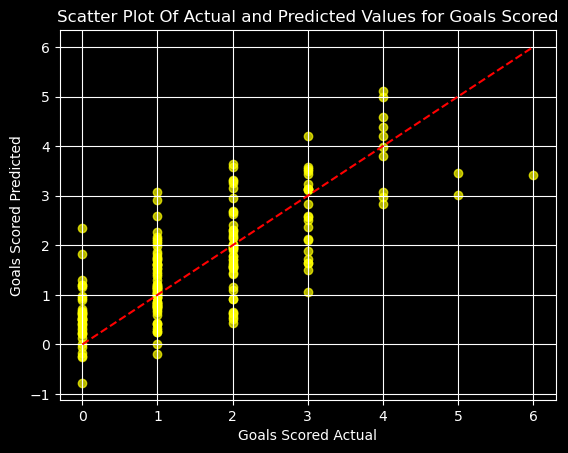

In [72]:
plt.scatter(Prem_df__Goals_scored["Goals_scored Actual"],Prem_df__Goals_scored["Goals_scored Predicted"], color='yellow', alpha=0.7)
plt.plot([Prem_df__Goals_scored['Goals_scored Actual'].min(), Prem_df__Goals_scored['Goals_scored Actual'].max()],
         [Prem_df__Goals_scored['Goals_scored Actual'].min(), Prem_df__Goals_scored['Goals_scored Actual'].max()],
         color='red', linestyle='--', label='y = x (Line of Perfect Prediction)')
plt.xlabel("Goals Scored Actual")
plt.ylabel("Goals Scored Predicted")
plt.title("Scatter Plot Of Actual and Predicted Values for Goals Scored")
plt.grid(True)
plt.show()